In [3]:
import torch
import torchvision
from torchvision import datasets,transforms

import torch.nn as nn
import torch.nn.functional as F

train = datasets.MNIST("",download = True,train = True, transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("",download = True,train = False, transform = transforms.Compose([transforms.ToTensor()]))

trainset = torch.utils.data.DataLoader(train,shuffle = True,batch_size = 10)
testset = torch.utils.data.DataLoader(test,shuffle = True,batch_size = 10)

class net(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28,64)
        self.fc2 = nn.Linear(64,64)
        self.fc3 = nn.Linear(64,64)
        self.fc4 = nn.Linear(64,10)
    
    def forward(self,x):
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x,dim=1)

Net = net()

print(Net)

net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [11]:
import torch.optim as optim

optimizer = optim.Adam(Net.parameters(),lr = 0.001)

EPOCHS = 5

for epoch in range(EPOCHS):
    
    for data in trainset:
        
        X,y = data
        
        Net.zero_grad()
        
        output = Net(X.view(-1,28*28))
        loss = F.nll_loss(output,y)
        loss.backward()
        optimizer.step()
        
    print(loss)

tensor(0.0446, grad_fn=<NllLossBackward>)
tensor(0.0924, grad_fn=<NllLossBackward>)
tensor(0.0030, grad_fn=<NllLossBackward>)
tensor(0.0082, grad_fn=<NllLossBackward>)
tensor(1.9168e-05, grad_fn=<NllLossBackward>)


In [14]:
correct = 0
total = 0

with torch.no_grad():
    
    for data in trainset:
        X,y = data
        output = Net(X.view(-1,28*28))
        
        for idx,i in enumerate(output):
            if(torch.argmax(i)==y[idx]):
                correct+=1
            total+=1

print(correct/total)

0.9917


In [15]:
correct = 0
total = 0

with torch.no_grad():
    
    for data in testset:
        X,y = data
        output = Net(X.view(-1,28*28))
        
        for idx,i in enumerate(output):
            if(torch.argmax(i)==y[idx]):
                correct+=1
            total+=1

print(correct/total)

0.9745


tensor(7)


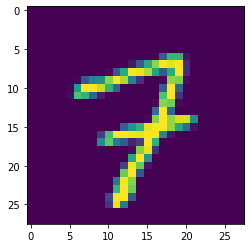

In [21]:
import matplotlib.pyplot as plt

plt.imshow(X[0].view(28,28))

print(torch.argmax(Net(X[0].view(-1,28*28))))

tensor(9)


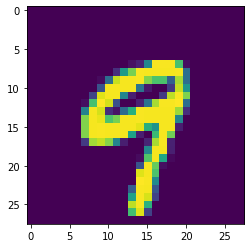

In [22]:
import matplotlib.pyplot as plt

plt.imshow(X[1].view(28,28))

print(torch.argmax(Net(X[1].view(-1,28*28))))

tensor(9)


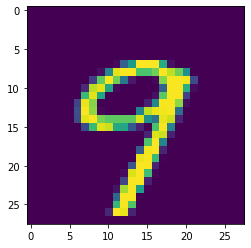

In [26]:
import matplotlib.pyplot as plt

plt.imshow(X[6].view(28,28))

print(torch.argmax(Net(X[6].view(-1,28*28))))